<a href="https://colab.research.google.com/github/altaga/Smart-Medicine-Control/blob/master/Google%20Colab%20Model%20Creator/SmartMedicineControl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Changing the TF Version

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


Libraries

In [0]:
import pandas
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


Checking the version

In [0]:
print(tf.__version__)

2.1.0-rc1


My Dataset URL

In [0]:
url  = 'https://raw.githubusercontent.com/altaga/MyDataSets/master/SMC/medicine.csv'

Obtaining the data and turning it into a Pandas dataframe.

This is a dataframe of the entry and exit of medications in a hospital in one year, with each row is one day of the year.

*   Mo1 = Output Medicine 1
*   Mo2 = Output Medicine 2
*   Mo3 = Output Medicine 3
*   Mo4 = Output Medicine 4
*   Mo5 = Output Medicine 5
*   Mi1 = Input Medicine 1
*   Mi2 = Input Medicine 2
*   Mi3 = Input Medicine 3
*   Mi4 = Input Medicine 4
*   Mi5 = Input Medicine 5
*   U = Urgency



In [0]:
data = pandas.read_csv(url)
data

,Mo1,Mo2,Mo3,Mo4,Mo5,Mi1,Mi2,Mi3,Mi4,Mi5,U
0,1,7,8,6,5,0,7,8,6,5,3
1,3,6,8,1,5,1,6,8,1,5,2
2,5,8,8,6,6,8,8,8,7,6,4
3,5,1,8,6,10,5,1,8,6,10,3
4,9,8,6,6,7,9,9,6,6,7,5
...,...,...,...,...,...,...,...,...,...,...,...
360,9,10,9,2,2,13,10,9,2,2,3
361,7,6,1,0,9,7,6,1,2,11,3
362,3,7,6,4,8,3,7,7,0,8,3
363,7,6,9,4,7,10,6,9,4,7,4


Reviewing the data

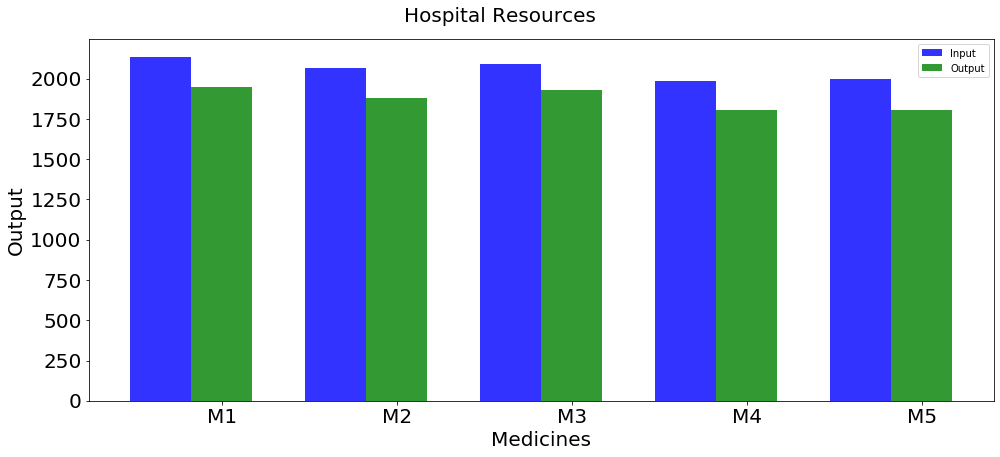

In [0]:
datas = data.sum(axis = 0, skipna = True) 

# Create Plots
fig, ax = plt.subplots(figsize = (14,6))
fig.suptitle('Hospital Resources', fontsize=20,y=1.05)

index = np.arange(5)
bar_width = 0.35
opacity = 0.8

plt.bar(index, [datas['Mi1'],datas['Mi2'],datas['Mi3'],datas['Mi4'],datas['Mi5']], bar_width,
alpha=opacity,
color='b',label='Input')

plt.bar(index + bar_width, [datas['Mo1'],datas['Mo2'],datas['Mo3'],datas['Mo4'],datas['Mo5']], bar_width,
alpha=opacity,
color='g',label='Output')

plt.xlabel('Medicines', fontsize=20)
plt.ylabel('Output', fontsize=20)
plt.xticks(index + bar_width, ('M1', 'M2', 'M3', 'M4','M5'),fontsize=20)
plt.yticks(fontsize=20)
plt.legend()

plt.tight_layout()
plt.show()


Creating model training data

In [0]:
# Characteristics (In Values)
characteristics= data.values[:,:5]
# Labels (Expected Model Results)
labels= data.values[:,5:11]

In [0]:
# We normalize the characteristics. We divide them by 255
characteristics_norm= characteristics/255

In [0]:
# We divide the data into training and evaluation
X_train, X_test, y_train, y_test = train_test_split(characteristics_norm, labels, test_size=0.2, random_state=21)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape=[5]),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(6)
  ])
optimizer = tf.keras.optimizers.RMSprop(0.0099)
model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 102       
Total params: 742
Trainable params: 742
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Be careful how many times you perform the epochs, to avoid overfitting the model.
history = model.fit(X_train,y_train,epochs=1000,validation_split=0.25,batch_size=20, verbose=1)

Train on 219 samples, validate on 73 samples
Epoch 1/1000
219/219 [==============================] - 1s 4ms/sample - loss: 31.0346 - accuracy: 0.1370 - val_loss: 20.0122 - val_accuracy: 0.1781
Epoch 2/1000
219/219 [==============================] - 0s 257us/sample - loss: 12.8356 - accuracy: 0.1416 - val_loss: 10.8552 - val_accuracy: 0.1781
Epoch 3/1000
219/219 [==============================] - 0s 243us/sample - loss: 10.0458 - accuracy: 0.1872 - val_loss: 10.6695 - val_accuracy: 0.1918
Epoch 4/1000
219/219 [==============================] - 0s 278us/sample - loss: 9.9193 - accuracy: 0.2374 - val_loss: 10.4342 - val_accuracy: 0.2466
Epoch 5/1000
219/219 [==============================] - 0s 242us/sample - loss: 9.8682 - accuracy: 0.2466 - val_loss: 10.4429 - val_accuracy: 0.1781
Epoch 6/1000
219/219 [==============================] - 0s 244us/sample - loss: 9.8945 - accuracy: 0.2831 - val_loss: 10.7351 - val_accuracy: 0.1918
Epoch 7/1000
219/219 [==============================] - 0s 2

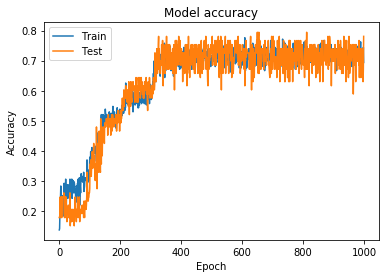

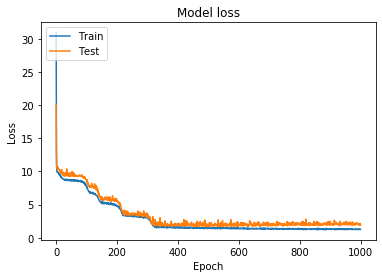

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# Stay here
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

# Save the model to disk
open("exercice_model.tflite", "wb").write(tflite_model)

4696

In [0]:
X_test = X_test.astype('float32')

# Instantiate an interpreter for each model
exercice_model = tf.lite.Interpreter('exercice_model.tflite')

# Allocate memory for each model
exercice_model.allocate_tensors()

# Get the input and output tensors so we can feed in values and get the results
input_details = exercice_model.get_input_details()
output_details = exercice_model.get_output_details()

test = 59

input_data = X_test[test].reshape((1,5))

print(input_data)

exercice_model.set_tensor(input_details[0]['index'],input_data )

exercice_model.invoke()
  
output_data = exercice_model.get_tensor(output_details[0]['index'])
    
  
print(np.around(output_data))  
print(y_test[test])    

[[0.03529412 0.02745098 0.01960784 0.03137255 0.03529412]]
[[10.  8.  5.  8. 10.  4.]]
[10  9  5  8  9  4]


In [0]:
import os
basic_model_size = os.path.getsize("exercice_model.tflite")
print("Basic model is %d bytes" % basic_model_size)

Basic model is 4696 bytes


In [0]:
# Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i exercice_model.tflite > exercice_model.cc
# Print the source file
!cat exercice_model.cc

unsigned char exercice_model_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x12, 0x00,
  0x1c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00,
  0x00, 0x00, 0x18, 0x00, 0x12, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x14, 0x12, 0x00, 0x00, 0xbc, 0x0c, 0x00, 0x00, 0xa4, 0x0c, 0x00, 0x00,
  0x34, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x90, 0xee, 0xff, 0xff, 0x08, 0x00, 0x00, 0x00,
  0x0e, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00, 0x6d, 0x69, 0x6e, 0x5f,
  0x72, 0x75, 0x6e, 0x74, 0x69, 0x6d, 0x65, 0x5f, 0x76, 0x65, 0x72, 0x73,
  0x69, 0x6f, 0x6e, 0x00, 0x0f, 0x00, 0x00, 0x00, 0x64, 0x0c, 0x00, 0x00,
  0x3c, 0x0c, 0x00, 0x00, 0xa4, 0x0a, 0x00, 0x00, 0x94, 0x06, 0x00, 0x00,
  0x44, 0x06, 0x00, 0x00, 0xf4, 0x05, 0x00, 0x00, 0xe4, 0x01, 0x00, 0x00,
  0x94, 0x01, 0x00, 0x00, 0x8c, 0x01, 0x00, 0x00, 0x84, 0x01, 0x00, 0x00,
  0x7c, 0x01, 0x00, 0x00, 0x2c, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x